<a href="https://colab.research.google.com/github/QuanTran420/QuanT/blob/main/Factor%20Affect%20To%20Churn%20Decisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [ ]:
curpath = os.getcwd()
parent = os.path.dirname(curpath)
path = os.path.join(parent, 'Raw data\\ChurnAnalysis.csv')
df = pd.read_csv(path)
df.head()

,user_id,total_video,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,join_via,days_in_vip,churn_status
0,45745320,0,0,0,0,0,0.000000,0,0.000000,Desktop,98,0
1,36485256,4,0,0,0,0,0.000000,0,0.000000,Desktop,36,0
2,52614000,14,551,15,0,23,1.378232,3,135.033333,Desktop,84,0
3,43295328,1,28,0,0,0,0.886389,0,0.000000,Desktop,120,0
4,70911240,1,28,10,0,10,0.770370,6,74.733333,Desktop,16,1


#### Data Dictionary ####
1. user_id: Mã người dùng
2. total_video: Tổng số video raw mà user đó sử dụng
3. normal_clips: Số lượng video mà sản phẩm tạo ra từ video raw cho user
4. downloaded_clips: Số lượng video đã được normal mà user đã tải về.
5. shared_clips: Số lượng video mà user chia sẻ lên Tiktok
6. edited_clips: Số lượng video mà user sử dụng sản phẩm để chỉnh sửa hoặc sáng tạo lại.
7. avg_waiting_time: Thời gian trung bình chờ đợi trước khi bắt đầu xem video.
8. days_active: Số ngày mà người dùng đã hoạt động trong hệ thống.
9. total_spent_minutes: Tổng thời gian trong việc sử dụng dịch vụ (tính bằng phút).
10. join_via: Phương thức mà user dùng để đăng nhập và sử dụng sản phẩm
11. days_in_vip: Số ngày mà người dùng đã sử dụng phiên bản VIP.
12. churn_status: Trạng thái churn (huỷ sử dụng VIP) của người dùng (1 tương ứng với churn, 0 tương ứng với non-churn).


#### Business Understanding ####
Công ty A đã nghiên cứu và phát triển một sản phẩm ứng dụng AI để tự động chỉnh sửa, chắt lọc và tạo ra các short-video hấp dẫn để tạo thành các content từ một video raw <br>
Objectives: Determine what is factor affect significantly to churn ratio. <br>
Questions:
- What is churn ratio? Churn Ratio = Sum Churn Status / Total Number of Users
- Descriptive Analysis: churn by join_via, how many customers churn?, what is the churn percentage?
- Descriptive Analysis: Separate churned and non-churned users then compare statistics value.
- Descriptive Analysis: What is behavior of customer by join_via_group
- Correlation Analysis: how each feature correlates with churn_status


#### Data Cleaning and Exploration Data Analysis ####

In [ ]:
#Check data type, null and duplicate
df.duplicated().sum() # return 0
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              1000 non-null   int64  
 1   total_video          1000 non-null   int64  
 2   normal_clips         1000 non-null   int64  
 3   downloaded_clips     1000 non-null   int64  
 4   shared_clips         1000 non-null   int64  
 5   edited_clips         1000 non-null   int64  
 6   avg_waiting_time     1000 non-null   float64
 7   days_active          1000 non-null   int64  
 8   total_spent_minutes  1000 non-null   float64
 9   join_via             1000 non-null   object 
 10  days_in_vip          1000 non-null   int64  
 11  churn_status         1000 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 93.9+ KB


#### 1. Descriptive Analysis: churn by join_via, how many customers churn?, what is the churn percentage? ####

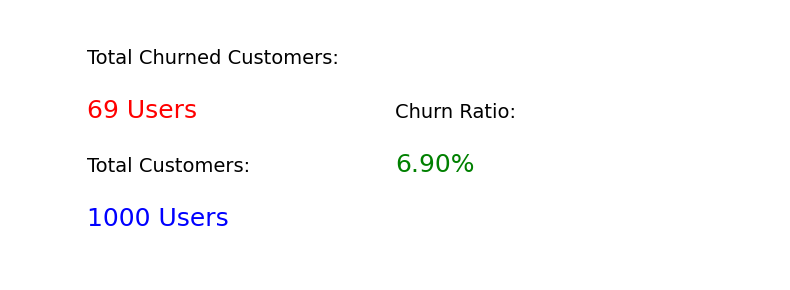

In [ ]:
# Calculate metrics
total_churn = df.churn_status.sum()
total_users = df.user_id.count()
churn_ratio = total_churn / total_users * 100

# Create a figure for KPI visualization
fig, ax = plt.subplots(figsize=(8, 3))

# Hide axes
ax.axis('off')

# Display KPI information
ax.text(0.1, 0.8, f'Total Churned Customers:', fontsize=14, ha='left')
ax.text(0.1, 0.6, f'{total_churn} Users', fontsize=18, ha='left', color='red')

ax.text(0.1, 0.4, f'Total Customers:', fontsize=14, ha='left')
ax.text(0.1, 0.2, f'{total_users} Users', fontsize=18, ha='left', color='blue')

ax.text(0.5, 0.6, f'Churn Ratio:', fontsize=14, ha='left')
ax.text(0.5, 0.4, f'{churn_ratio:.2f}%', fontsize=18, ha='left', color='green')

# Adjust layout
plt.tight_layout()
plt.show()

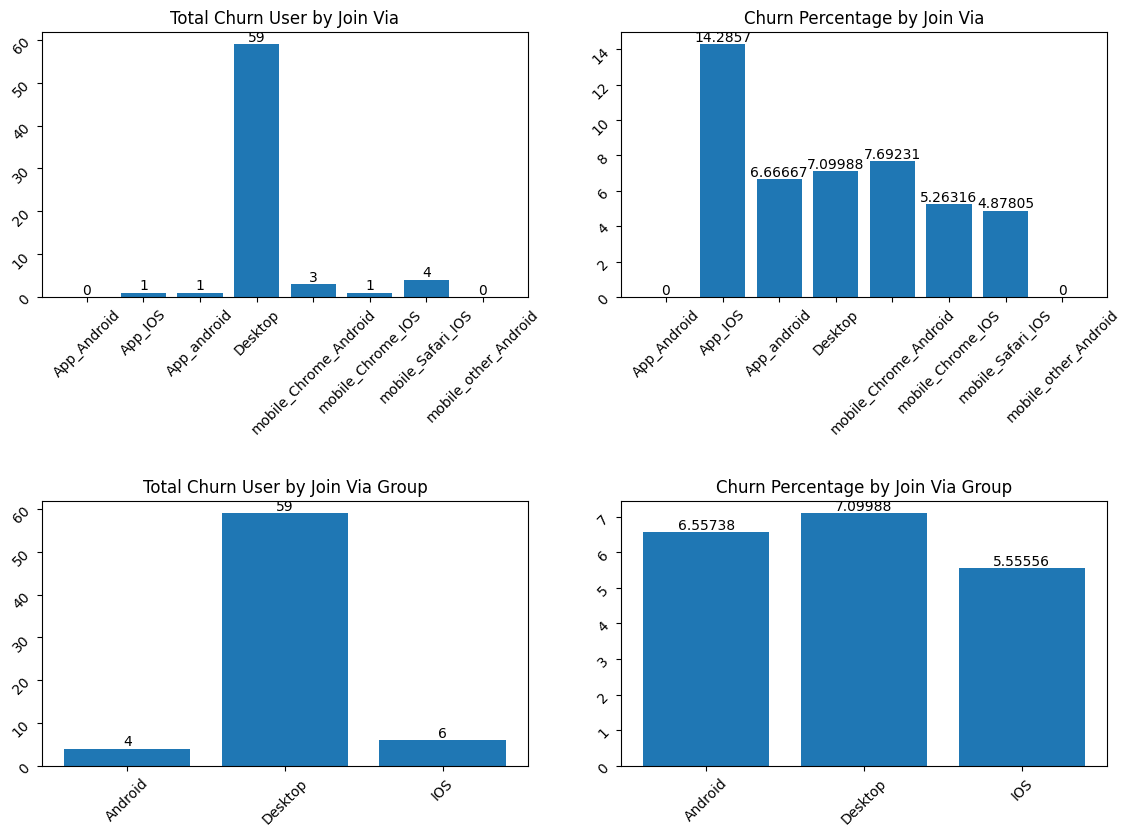

In [ ]:
# Total Churn by Join Via
gr_joinvia = df.groupby('join_via').agg(TotalUser=('user_id','count'), ChurnUser=('churn_status','sum')).reset_index()
gr_joinvia['ChurnRatio'] = gr_joinvia['ChurnUser'] / gr_joinvia['TotalUser'] * 100

# Total Churn by Join Via Group
df['join_via_group'] = df['join_via'].apply(lambda x: 'Desktop' if 'DESKTOP' in x.upper() else ('IOS' if 'IOS' in x.upper() else 'Android'))
gr_joinvia_group = df.groupby('join_via_group').agg(TotalUser=('user_id','count'), ChurnUser=('churn_status','sum')).reset_index()
gr_joinvia_group['ChurnRatio'] = gr_joinvia_group['ChurnUser'] / gr_joinvia_group['TotalUser'] * 100

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 9))

# First Chart: Total Churn Users by Join Via
barchart = ax[0,0].bar(x=gr_joinvia['join_via'], height=gr_joinvia['ChurnUser'])
ax[0,0].tick_params(rotation=45)
ax[0,0].bar_label(container=barchart)
ax[0,0].set_title('Total Churn User by Join Via')

# Second Chart: Churn Ratio by Join Via
barchart1 = ax[0,1].bar(x=gr_joinvia['join_via'], height=gr_joinvia['ChurnRatio'])
ax[0,1].tick_params(rotation=45)
ax[0,1].bar_label(container=barchart1)
ax[0,1].set_title('Churn Percentage by Join Via')

# Third Chart: Total Churn Users by Join Via
barchart2 = ax[1,0].bar(x=gr_joinvia_group['join_via_group'], height=gr_joinvia_group['ChurnUser'])
ax[1,0].tick_params(rotation=45)
ax[1,0].bar_label(container=barchart2)
ax[1,0].set_title('Total Churn User by Join Via Group')

# Fourth Chart: Churn Ratio by Join Via
barchart3 = ax[1,1].bar(x=gr_joinvia_group['join_via_group'], height=gr_joinvia_group['ChurnRatio'])
ax[1,1].tick_params(rotation=45)
ax[1,1].bar_label(container=barchart3)
ax[1,1].set_title('Churn Percentage by Join Via Group')

plt.tight_layout(pad=3.0)  # Adding padding between plots

plt.show()


#### 2. Descriptive Analysis: Separate churned and non-churned users then compare statistics value ####

In [ ]:
df['Status'] = df['churn_status'].apply(lambda x: 'Churned' if x == 1 else 'Non-churned')
df.head()

,user_id,total_video,normal_clips,downloaded_clips,shared_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes,join_via,days_in_vip,churn_status,join_via_group,Status
0,45745320,0,0,0,0,0,0.000000,0,0.000000,Desktop,98,0,Desktop,Non-churned
1,36485256,4,0,0,0,0,0.000000,0,0.000000,Desktop,36,0,Desktop,Non-churned
2,52614000,14,551,15,0,23,1.378232,3,135.033333,Desktop,84,0,Desktop,Non-churned
3,43295328,1,28,0,0,0,0.886389,0,0.000000,Desktop,120,0,Desktop,Non-churned
4,70911240,1,28,10,0,10,0.770370,6,74.733333,Desktop,16,1,Desktop,Churned


In [ ]:
gr_status = df.groupby('Status')[['normal_clips', 'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes']].mean().reset_index()
gr_status

,Status,normal_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes
0,Churned,26.086957,0.652174,0.353628,0.884058,19.37971
1,Non-churned,36.638024,1.049409,1.027015,1.106337,31.98396


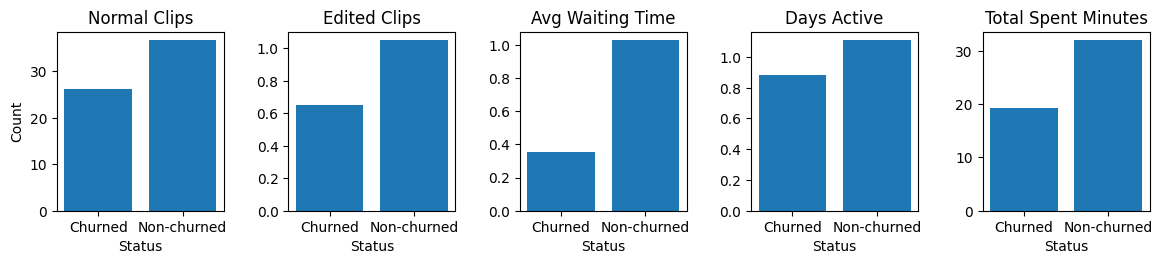

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(12,3))
# Bar chart for normal_clips
ax[0].bar(gr_status['Status'], gr_status['normal_clips'])
ax[0].set_title('Normal Clips')
ax[0].set_xlabel('Status')
ax[0].set_ylabel('Count')

# Bar chart for edited_clips
ax[1].bar(gr_status['Status'], gr_status['edited_clips'])
ax[1].set_title('Edited Clips')
ax[1].set_xlabel('Status')

# Bar chart for avg_waiting_time
ax[2].bar(gr_status['Status'], gr_status['avg_waiting_time'])
ax[2].set_title('Avg Waiting Time')
ax[2].set_xlabel('Status')

# Bar chart for days_active
ax[3].bar(gr_status['Status'], gr_status['days_active'])
ax[3].set_title('Days Active')
ax[3].set_xlabel('Status')

# Bar chart for total_spent_minutes
ax[4].bar(gr_status['Status'], gr_status['total_spent_minutes'])
ax[4].set_title('Total Spent Minutes')
ax[4].set_xlabel('Status')

# Adjust layout
plt.tight_layout(pad=2.0)

# Show plot
plt.show()

#### 3. Descriptive Analysis: What is behavior of customer by join_via_group ####

In [ ]:
gr_status_join_via = df.groupby(['Status','join_via_group'])[['normal_clips', 'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes']].mean().reset_index()
gr_status_join_via

,Status,join_via_group,normal_clips,edited_clips,avg_waiting_time,days_active,total_spent_minutes
0,Churned,Android,36.500000,0.000000,0.126736,0.500000,0.250000
1,Churned,Desktop,22.847458,0.762712,0.362376,0.881356,21.863559
2,Churned,IOS,51.000000,0.000000,0.418861,1.166667,7.708333
3,Non-churned,Android,35.122807,1.192982,0.477489,1.456140,30.741813
4,Non-churned,Desktop,34.838083,1.009067,1.119765,1.033679,30.104642
5,Non-churned,IOS,51.107843,1.274510,0.632108,1.460784,46.901961


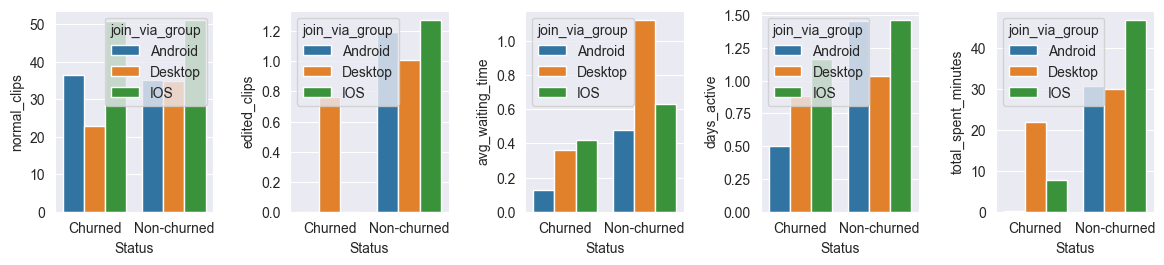

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(12,3))
# Bar chart for normal_clips
sns.barplot(data=gr_status_join_via, x='Status', y='normal_clips', hue='join_via_group', ax=ax[0])

# Bar chart for edited_clips
sns.barplot(data=gr_status_join_via, x='Status', y='edited_clips', hue='join_via_group', ax=ax[1])

# Bar chart for avg_waiting_time
sns.barplot(data=gr_status_join_via, x='Status', y='avg_waiting_time', hue='join_via_group', ax=ax[2])

# Bar chart for days_active
sns.barplot(data=gr_status_join_via, x='Status', y='days_active', hue='join_via_group', ax=ax[3])

# Bar chart for total_spent_minutes
sns.barplot(data=gr_status_join_via, x='Status', y='total_spent_minutes', hue='join_via_group', ax=ax[4])

# Adjust layout
plt.tight_layout(pad=2.0)

# Show plot
plt.show()

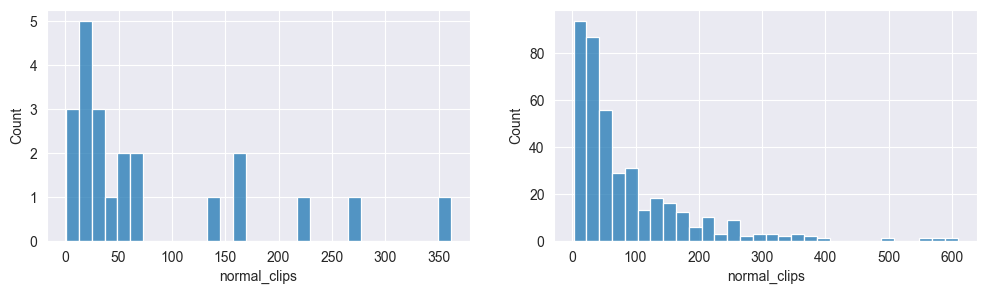

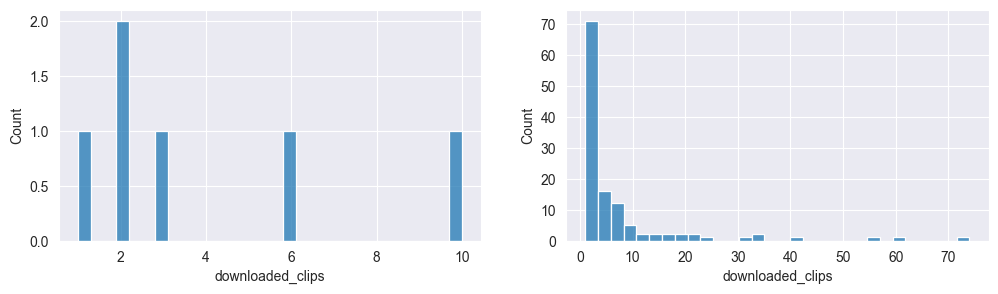

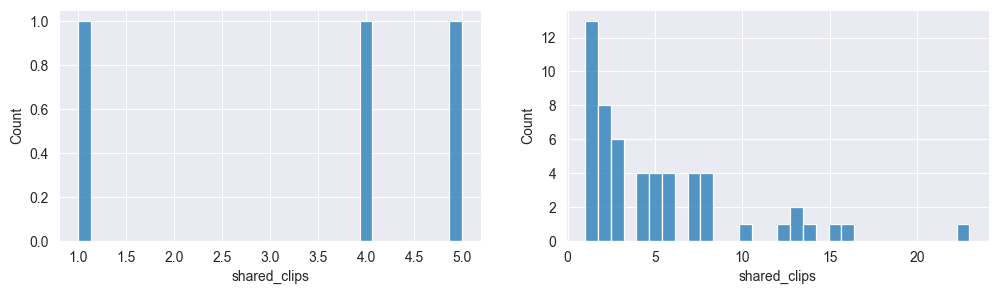

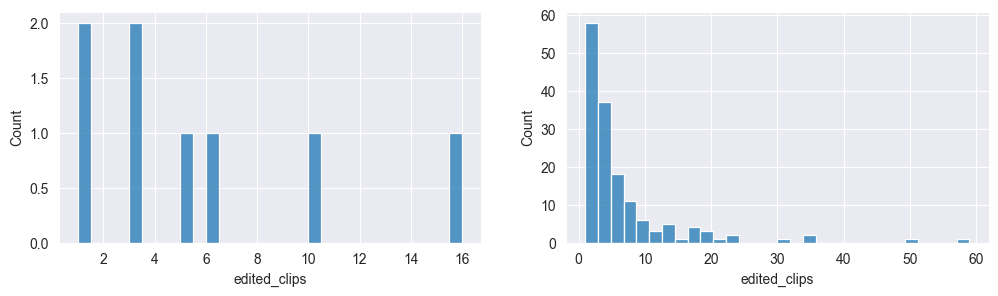

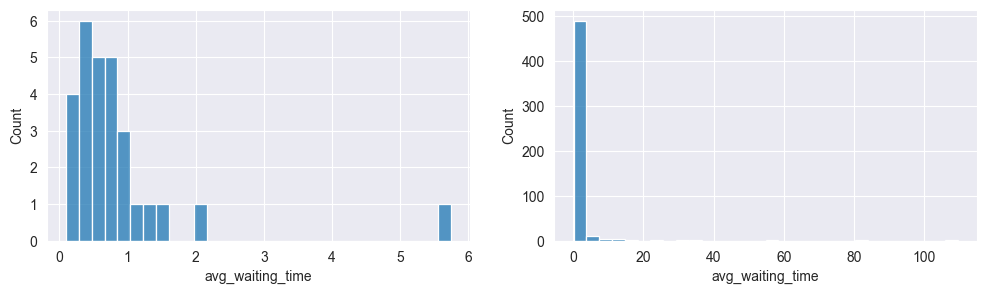

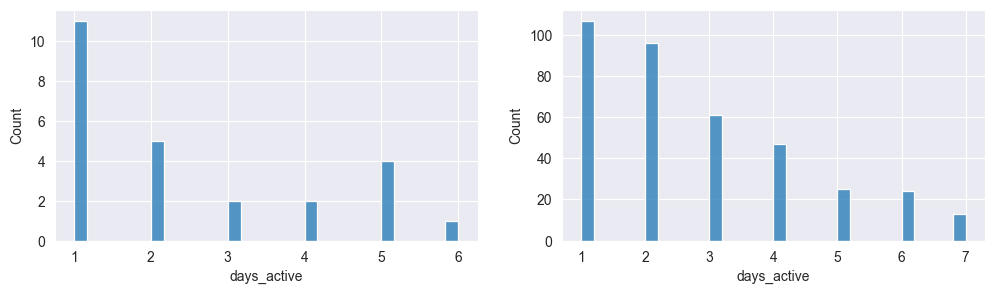

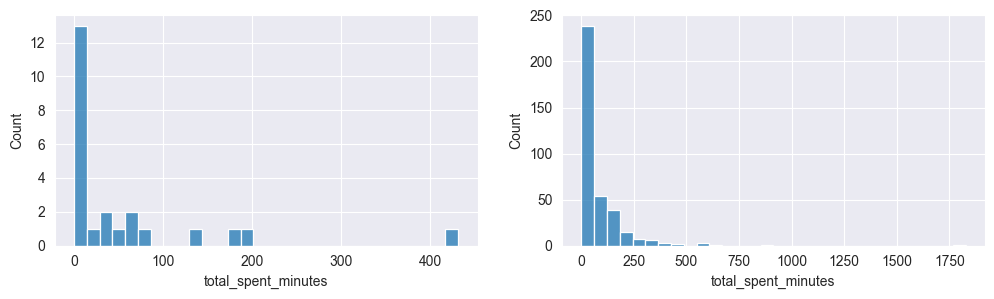

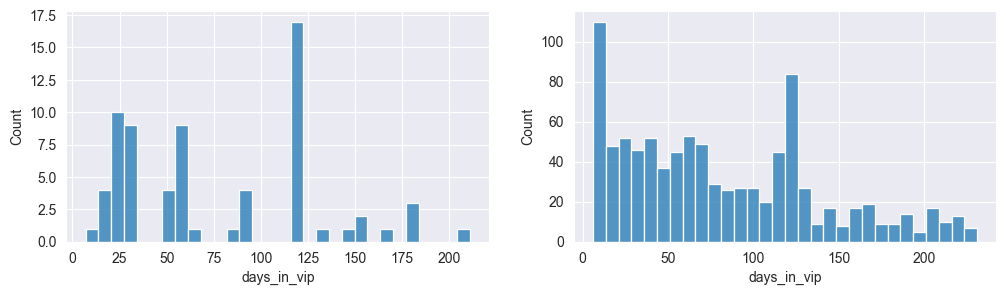

In [ ]:
#Comparing difference between churn and active customer.
cols = ['normal_clips', 'downloaded_clips', 'shared_clips', 'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes', 'days_in_vip']
for col in cols:
    fig, ax = plt.subplots(ncols=2, figsize=(12,3))
    sns.histplot(df[(df['Status'] == 'Churned') & (df[col] > 0)][col], ax=ax[0], bins=30)
    sns.histplot(df[(df['Status'] == 'Non-churned')  & (df[col] > 0)][col], ax=ax[1], bins=30)
    plt.show()


<Axes: xlabel='days_in_vip', ylabel='Count'>

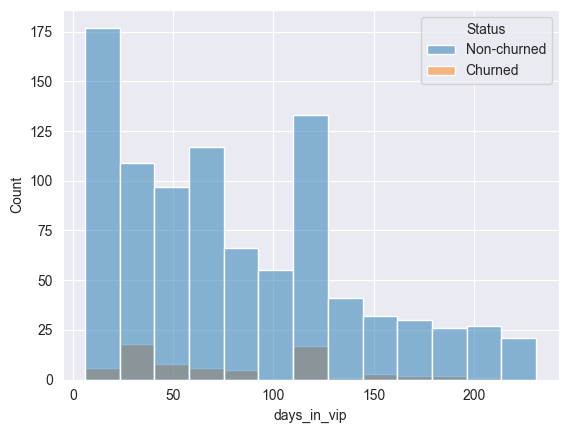

In [ ]:
sns.histplot(df, x='days_in_vip', hue='Status')

#### 4. Correlation Analysis: how each feature correlates with churn_status ####
Assump that: Focus on normal_clips, edited_clips, avg_waiting_time, days_active, total_spent_minutes

<Axes: >

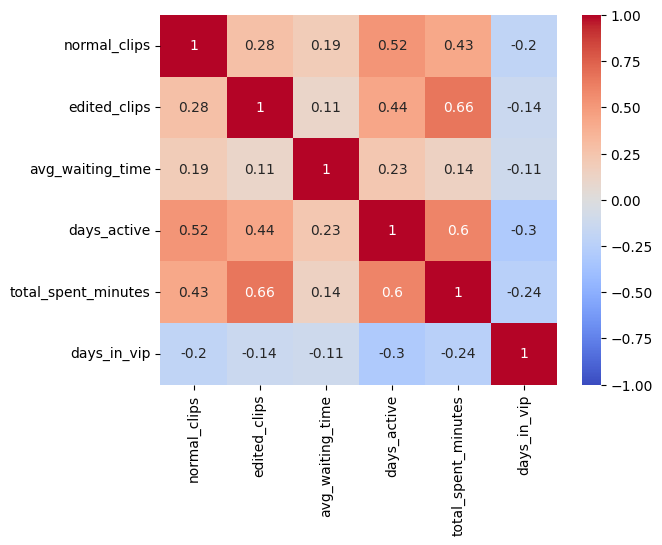

In [ ]:
corre = df[['normal_clips', 'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes','days_in_vip']].corr()
sns.heatmap(corre, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

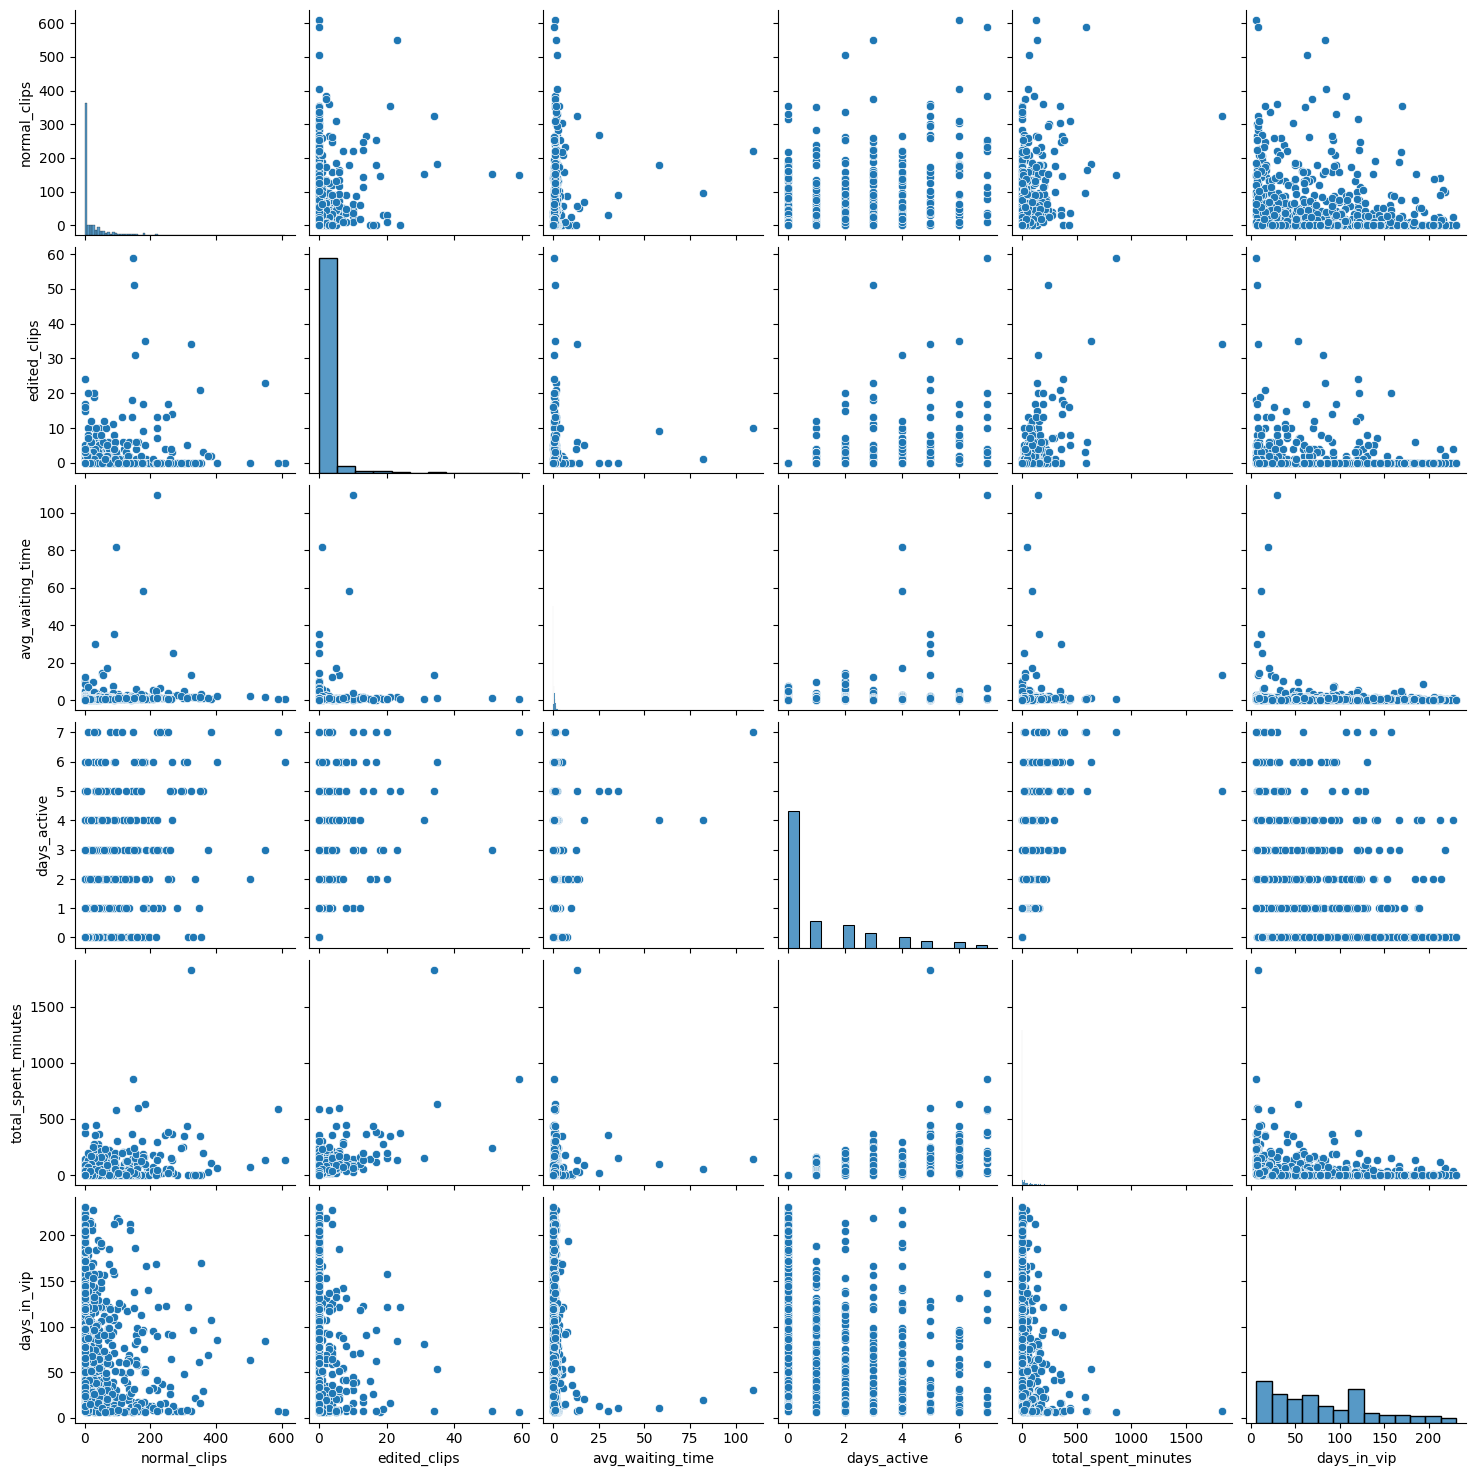

In [ ]:
sns.pairplot(df[['normal_clips', 'edited_clips', 'avg_waiting_time', 'days_active', 'total_spent_minutes','days_in_vip']])